<a href="https://colab.research.google.com/github/punyaravichandran/Delete22/blob/main/SimulationRrs_SatelliteRrs_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load CSV file
SAMRef_data = pd.read_csv(r'/content/Reflectance_SAM_2019-2024.csv')
Absorption_data = pd.read_csv(r'/content/Scotian_Shelf_Pigment_Taxo_Absorption_2019-2024.csv')
#Rename the coloumn
SAMRef_data.rename(columns={'isdata$SAMPLE_ID': 'SAMPLE_ID'}, inplace=True)
#SAMRef_data.head()
#Merge two dataframes
Final_df = pd.merge(SAMRef_data, Absorption_data, on='SAMPLE_ID')
Final_df.Date.head()

,Date
0,2019-06-07
1,2019-06-08
2,2020-07-22
3,2020-07-22
4,2020-07-24


In [3]:
# Calculate the average of all data columns
average_of_all_columns = SAMRef_data.mean(numeric_only=True)
average_of_all_columns.index.name = 'Wavebands' # Set the name of the index

average = average_of_all_columns.reset_index()
average.columns = ['Wavebands','Reflectance']
#average.head()
finalRef = average[average['Wavebands'] != 'SAMPLE_ID'] # Filter using 'Wavebands' column, not 'index'

In [4]:
import datetime
#Convert to pandas datetime format
#Final_df['SAMPLE_DATE'] = pd.to_datetime(Final_df[['YEAR','MONTH','DAY']])
Final_df['SAMPLE_DATE'] = pd.to_datetime(Final_df['Date'])#, format='%d-%m-%Y')
#set 3 coloumsn with year month and day
Final_df['YEAR'] = Final_df['SAMPLE_DATE'].dt.year
Final_df['MONTH'] = Final_df['SAMPLE_DATE'].dt.month
Final_df['DAY'] = Final_df['SAMPLE_DATE'].dt.day

In [5]:
#Filter the data to a depth of less than 20 meters
#Filtered_data = Final_df[Final_df['DEPTH'] < 20]
Filtered_data = Final_df
# Round 'START_LAT' and 'START_LON' to 2 decimal places
Filtered_data['START_LAT'] = Filtered_data['START_LAT'].round(0)
Filtered_data['START_LON'] = Filtered_data['START_LON'].round(0)

In [6]:
#Set the index to SAMPLE_DATE
Filtered_data = Filtered_data.set_index(['SAMPLE_DATE'])

In [7]:
#chose for a date - 20th Oct 2024
# Filter Reflection_Coloumn for the specific date
date_2024_04_11 = Filtered_data.loc['2024-04-11']

# Display the filtered data
display(date_2024_04_11)

,SAMPLE_ID,Refl400nm,Refl401nm,Refl402nm,Refl403nm,Refl404nm,Refl405nm,Refl406nm,Refl407nm,Refl408nm,...,wv694nm,wv695nm,wv696nm,wv697nm,wv698nm,wv699nm,wv700nm,YEAR,MONTH,DAY
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-11,503043,0.028230,0.028297,0.028364,0.028412,0.028443,0.028477,0.028485,0.028488,0.028485,...,0.004463,0.003477,0.002601,0.001819,0.001127,0.000522,0.0,2024,4,11
2024-04-11,503052,0.022977,0.023027,0.023071,0.023100,0.023119,0.023148,0.023170,0.023206,0.023257,...,0.004839,0.003801,0.002863,0.002016,0.001256,0.000585,0.0,2024,4,11
2024-04-11,503055,0.019782,0.019847,0.019903,0.019941,0.019965,0.019990,0.020005,0.020024,0.020050,...,0.006007,0.004696,0.003518,0.002455,0.001510,0.000691,0.0,2024,4,11
2024-04-11,503067,0.043975,0.044171,0.044302,0.044308,0.044199,0.044058,0.043806,0.043541,0.043277,...,0.001521,0.001213,0.000918,0.000631,0.000370,0.000155,0.0,2024,4,11
2024-04-11,503075,0.050724,0.051140,0.051517,0.051755,0.051850,0.051896,0.051780,0.051636,0.051485,...,0.001256,0.000979,0.000729,0.000503,0.000304,0.000135,0.0,2024,4,11
2024-04-11,503078,0.044755,0.045119,0.045466,0.045714,0.045850,0.045943,0.045900,0.045825,0.045732,...,0.001102,0.000864,0.000649,0.000452,0.000275,0.000123,0.0,2024,4,11


In [8]:
#date_2024_04_11.START_LAT.unique()

In [9]:
#date_2024_04_11.START_LON.unique()

In [10]:
#Filter for a location (Latitude, Longitude)
# Filter the data for the specific location
location_filtered_data = date_2024_04_11[(date_2024_04_11['START_LAT'] == 44) & (date_2024_04_11['START_LON'] == -63)]

# Display the filtered data
display(location_filtered_data.head())

,SAMPLE_ID,Refl400nm,Refl401nm,Refl402nm,Refl403nm,Refl404nm,Refl405nm,Refl406nm,Refl407nm,Refl408nm,...,wv694nm,wv695nm,wv696nm,wv697nm,wv698nm,wv699nm,wv700nm,YEAR,MONTH,DAY
SAMPLE_DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-11,503043,0.028230,0.028297,0.028364,0.028412,0.028443,0.028477,0.028485,0.028488,0.028485,...,0.004463,0.003477,0.002601,0.001819,0.001127,0.000522,0.0,2024,4,11
2024-04-11,503052,0.022977,0.023027,0.023071,0.023100,0.023119,0.023148,0.023170,0.023206,0.023257,...,0.004839,0.003801,0.002863,0.002016,0.001256,0.000585,0.0,2024,4,11
2024-04-11,503055,0.019782,0.019847,0.019903,0.019941,0.019965,0.019990,0.020005,0.020024,0.020050,...,0.006007,0.004696,0.003518,0.002455,0.001510,0.000691,0.0,2024,4,11
2024-04-11,503067,0.043975,0.044171,0.044302,0.044308,0.044199,0.044058,0.043806,0.043541,0.043277,...,0.001521,0.001213,0.000918,0.000631,0.000370,0.000155,0.0,2024,4,11
2024-04-11,503075,0.050724,0.051140,0.051517,0.051755,0.051850,0.051896,0.051780,0.051636,0.051485,...,0.001256,0.000979,0.000729,0.000503,0.000304,0.000135,0.0,2024,4,11


In [11]:
#Daily algal Reflection Spectra
#Select the reflection bands
Reflection = location_filtered_data[['Refl400nm','Refl401nm','Refl402nm','Refl403nm','Refl404nm','Refl405nm','Refl406nm','Refl407nm','Refl408nm','Refl409nm','Refl410nm','Refl411nm','Refl412nm','Refl413nm','Refl414nm',
    'Refl415nm','Refl416nm','Refl417nm','Refl418nm','Refl419nm','Refl420nm','Refl421nm','Refl422nm','Refl423nm','Refl424nm','Refl425nm','Refl426nm','Refl427nm','Refl428nm','Refl429nm','Refl430nm','Refl431nm','Refl432nm',
    'Refl433nm','Refl434nm','Refl435nm','Refl436nm','Refl437nm','Refl438nm','Refl439nm','Refl440nm','Refl441nm','Refl442nm','Refl443nm','Refl444nm','Refl445nm','Refl446nm','Refl447nm','Refl448nm','Refl449nm','Refl450nm',
    'Refl451nm','Refl452nm','Refl453nm','Refl454nm','Refl455nm','Refl456nm','Refl457nm','Refl458nm','Refl459nm','Refl460nm','Refl461nm','Refl462nm','Refl463nm','Refl464nm','Refl465nm','Refl466nm','Refl467nm','Refl468nm',
    'Refl469nm','Refl470nm','Refl471nm','Refl472nm','Refl473nm','Refl474nm','Refl475nm','Refl476nm','Refl477nm','Refl478nm','Refl479nm','Refl480nm','Refl481nm','Refl482nm','Refl483nm','Refl484nm','Refl485nm','Refl486nm',
    'Refl487nm','Refl488nm','Refl489nm','Refl490nm','Refl491nm','Refl492nm','Refl493nm','Refl494nm','Refl495nm','Refl496nm','Refl497nm','Refl498nm','Refl499nm','Refl500nm','Refl501nm','Refl502nm','Refl503nm','Refl504nm',
    'Refl505nm','Refl506nm','Refl507nm','Refl508nm','Refl509nm','Refl510nm','Refl511nm','Refl512nm','Refl513nm','Refl514nm','Refl515nm','Refl516nm','Refl517nm','Refl518nm','Refl519nm','Refl520nm','Refl521nm','Refl522nm',
    'Refl523nm','Refl524nm','Refl525nm','Refl526nm','Refl527nm','Refl528nm','Refl529nm','Refl530nm','Refl531nm','Refl532nm','Refl533nm','Refl534nm','Refl535nm','Refl536nm','Refl537nm','Refl538nm','Refl539nm','Refl540nm',
    'Refl541nm','Refl542nm','Refl543nm','Refl544nm','Refl545nm','Refl546nm','Refl547nm','Refl548nm','Refl549nm','Refl550nm','Refl551nm','Refl552nm','Refl553nm','Refl554nm','Refl555nm','Refl556nm','Refl557nm','Refl558nm',
    'Refl559nm','Refl560nm','Refl561nm','Refl562nm','Refl563nm','Refl564nm','Refl565nm','Refl566nm','Refl567nm','Refl568nm','Refl569nm','Refl570nm','Refl571nm','Refl572nm','Refl573nm','Refl574nm','Refl575nm','Refl576nm',
    'Refl577nm','Refl578nm','Refl579nm','Refl580nm','Refl581nm','Refl582nm','Refl583nm','Refl584nm','Refl585nm','Refl586nm','Refl587nm','Refl588nm','Refl589nm','Refl590nm','Refl591nm','Refl592nm','Refl593nm','Refl594nm',
    'Refl595nm','Refl596nm','Refl597nm','Refl598nm','Refl599nm','Refl600nm','Refl601nm','Refl602nm','Refl603nm','Refl604nm','Refl605nm','Refl606nm','Refl607nm','Refl608nm','Refl609nm','Refl610nm','Refl611nm','Refl612nm',
    'Refl613nm','Refl614nm','Refl615nm','Refl616nm','Refl617nm','Refl618nm','Refl619nm','Refl620nm','Refl621nm','Refl622nm','Refl623nm','Refl624nm','Refl625nm','Refl626nm','Refl627nm','Refl628nm','Refl629nm','Refl630nm',
    'Refl631nm','Refl632nm','Refl633nm','Refl634nm','Refl635nm','Refl636nm','Refl637nm','Refl638nm','Refl639nm','Refl640nm','Refl641nm','Refl642nm','Refl643nm','Refl644nm','Refl645nm','Refl646nm','Refl647nm','Refl648nm',
    'Refl649nm','Refl650nm','Refl651nm','Refl652nm','Refl653nm','Refl654nm','Refl655nm','Refl656nm','Refl657nm','Refl658nm','Refl659nm','Refl660nm','Refl661nm','Refl662nm','Refl663nm','Refl664nm','Refl665nm','Refl666nm',
    'Refl667nm','Refl668nm','Refl669nm','Refl670nm','Refl671nm','Refl672nm','Refl673nm','Refl674nm','Refl675nm','Refl676nm','Refl677nm','Refl678nm','Refl679nm','Refl680nm','Refl681nm','Refl682nm','Refl683nm','Refl684nm',
    'Refl685nm','Refl686nm','Refl687nm','Refl688nm','Refl689nm','Refl690nm','Refl691nm','Refl692nm','Refl693nm','Refl694nm','Refl695nm','Refl696nm','Refl697nm','Refl698nm','Refl699nm','Refl700nm']]
Reflection_Coloumn = Reflection.transpose()#
Reflection_Coloumn.head()

SAMPLE_DATE,2024-04-11,2024-04-11,2024-04-11,2024-04-11,2024-04-11,2024-04-11
Refl400nm,0.028230,0.022977,0.019782,0.043975,0.050724,0.044755
Refl401nm,0.028297,0.023027,0.019847,0.044171,0.051140,0.045119
Refl402nm,0.028364,0.023071,0.019903,0.044302,0.051517,0.045466
Refl403nm,0.028412,0.023100,0.019941,0.044308,0.051755,0.045714
Refl404nm,0.028443,0.023119,0.019965,0.044199,0.051850,0.045850


In [12]:
#set the coloumn name
Reflection_Coloumn.index.name = 'Wavebands' # Set the name of the index
# Reset the index to make 'Wavebands' a column
Reflection_Coloumn = Reflection_Coloumn.reset_index()

/tmp/ipython-input-3035670943.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


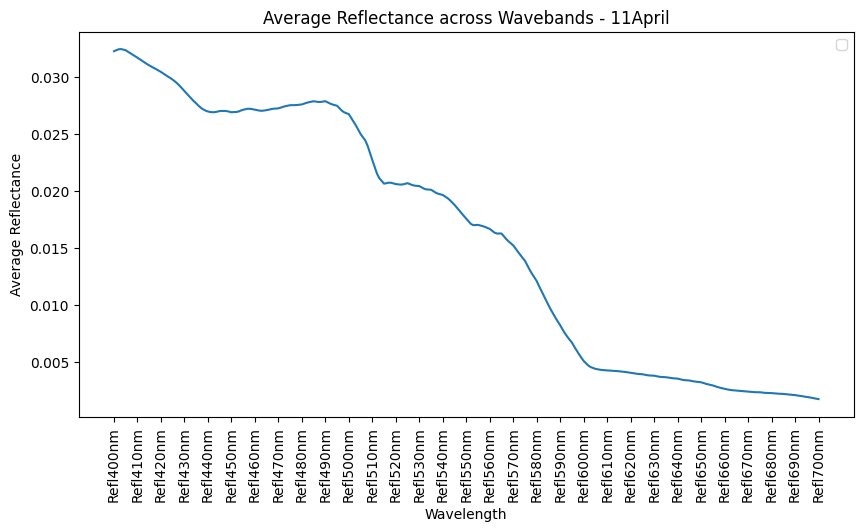

In [13]:
# Plot the average reflectance
plt.figure(figsize=(10, 5))
plt.plot(finalRef['Wavebands'], finalRef['Reflectance'], linestyle='solid')

# Customize the plot
plt.xlabel('Wavelength')
plt.ylabel('Average Reflectance')
plt.title('Average Reflectance across Wavebands - 11April')
plt.xticks(np.arange(0, 301, step=10), rotation=90)
#plt.grid(True) # Add a grid for better readability
plt.rcParams['xtick.labelsize'] = 7
plt.legend()
plt.show()

In [14]:
###Load the satellite data###

In [15]:
%pip install earthaccess

In [16]:
#Load libraries
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from scipy.integrate import trapezoid
import re
import matplotlib.pyplot as plt
from xarray.backends.api import open_datatree

In [17]:
#NASA Earthdata Authentication
auth = earthaccess.login(persist=True)

In [18]:
# For Rrs
bbox = (-71, 40, -55, 50)
tspan = ("2024-04-11", "2024-04-11")
clouds = (0, 100)

results = earthaccess.search_data(
    short_name="PACE_OCI_L2_AOP",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)

fileset1 = earthaccess.open(results);

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
#Browse the file
paths = earthaccess.open(results)#[:1])
datatree = open_datatree(paths[0])
dataset = xr.merge(datatree.to_dict().values())
dataset = dataset.set_coords(("latitude", "longitude"))
#dataset

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipython-input-3990890398.py:3: FutureWarning: In a future version, xarray will not decode the variable 'day' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  datatree = open_datatree(paths[0])
/tmp/ipython-input-3990890398.py:3: FutureWarning: In a future version, xarray will not decode the variable 'msec' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding

In [20]:
refl_data = dataset['Rrs']

In [21]:
#subset to 400-700nm
refl_subset = refl_data.sel(wavelength_3d=slice(399, 700))

In [22]:
# Step 3: Convert to chunked (Dask-backed) DataArray
rrs_chunked = refl_subset.chunk({"number_of_lines": 200, "pixels_per_line": 200})  # Or use "time", "band", etc.

In [23]:
#replace negative reflection - mask
rrs_chunked = rrs_chunked.where(rrs_chunked >= 0)

In [24]:
# Round latitude and longitude to two decimal places
rrs_chunked['latitude'] = rrs_chunked['latitude'].round(0)
rrs_chunked['longitude'] = rrs_chunked['longitude'].round(0)

In [25]:
# Drop NaNs for coarsening to work
rrs_data_clean = rrs_chunked.copy()
rrs_data_clean = rrs_data_clean.fillna(0)

In [29]:
def extract_3x3_mean(ds, lat0, lon0):
    # Compute distance to find nearest index
    dist = (ds['latitude'] - lat0)**2 + (ds['longitude'] - lon0)**2
    iy, ix = np.unravel_index(dist.argmin().values, dist.shape)

    # Extract 3×3 window
    sub = ds.isel(
        number_of_lines=slice(max(0, iy-1), iy+2),
        pixels_per_line=slice(max(0, ix-1), ix+2)
    )

    # Mean over spatial dimensions
    return sub.mean(dim=("number_of_lines", "pixels_per_line"))

# Example usage for first station
spec1 = extract_3x3_mean(rrs_data_clean, 44.0, -63.0)

# Turn into dataframe
df = spec1.to_dataframe().reset_index().rename(columns={'index':'wavelength_3d'})
print(df.head())

   wavelength_3d  Rrs
0          400.0  0.0
1          403.0  0.0
2          405.0  0.0
3          408.0  0.0
4          410.0  0.0


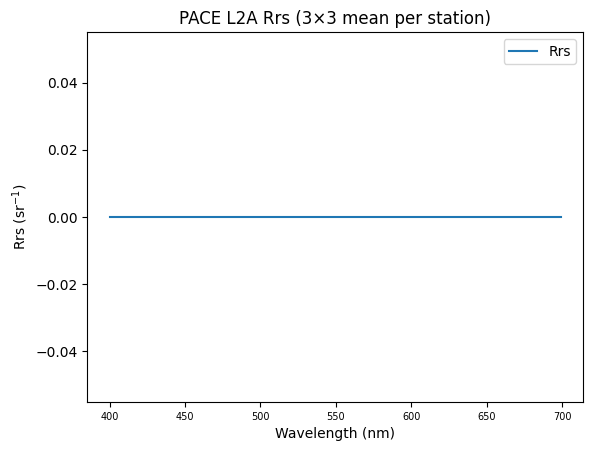

In [31]:
# Plot
df.plot(x='wavelength_3d', y='Rrs')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Rrs (sr$^{-1}$)")
plt.title("PACE L2A Rrs (3×3 mean per station)")
plt.show()

In [32]:
# Prepare ground truth data
# Assuming 'finalRef' contains the ground truth data with 'Wavebands' and 'Reflectance' columns
# Extract wavelengths and reflectance values
surface_wavelengths = finalRef['Wavebands'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
surface_reflectance = finalRef['Reflectance'].values

# Prepare satellite data
# Assuming 'df' contains the satellite data with 'wavelength_3d' and 'Rrs' columns
satellite_wavelengths = df['wavelength_3d'].values
satellite_reflectance = df['Rrs'].values

# For demonstration purposes, let's create a combined DataFrame
# In a real analysis, you might need to interpolate one dataset to match the wavelengths of the other
# or handle different wavelength ranges based on your specific needs.
# Here, we'll just put them into a structure similar to what the normalization function expects
# and assume compatible wavelengths for now.

# This part needs to be adapted based on how you want to compare and structure the data.
# For now, let's just create a dictionary with the relevant data.
# This structure might need adjustment depending on how the 'minmax_norm_global' and plotting functions are intended to be used.

# Example of how you might structure the data for normalization (assuming similar wavelengths)
# You would likely need to align the wavelengths more rigorously in a real application
combined_data = {
    'surface_reflectance': surface_reflectance,
    'satellite_reflectance': satellite_reflectance,
    'wavelengths': surface_wavelengths # Or satellite_wavelengths, if aligning the other way
}

# Note: The existing normalization and plotting cells seem to expect a DataFrame
# with columns like 'surface_reflectance', 'satellite_reflectance', 'wavelengths', 'location', 'time'.
# This cell provides the basic arrays. You would need to integrate this into a DataFrame
# with appropriate location and time information if you want to use the existing plotting cell as is.

print("Data prepared for comparison.")

Data prepared for comparison.


In [ ]:
# Resample (coarsen) by 3 in both lat and lon
rrs_data_coarse = rrs_data_clean.coarsen(number_of_lines=5, pixels_per_line=5, boundary='trim').mean()

# Reassign latitude and longitude as coordinates
rrs_data_coarse = rrs_data_coarse.assign_coords({
    'latitude': (('number_of_lines', 'pixels_per_line'), rrs_data_coarse['latitude'].values),
    'longitude': (('number_of_lines', 'pixels_per_line'), rrs_data_coarse['longitude'].values)
})

In [ ]:
#chose a particular location using data cordinates (lat,lon)
# Replace with your desired latitude and longitude
selected_latitude = 42.0
selected_longitude = -61.0

# Calculate the squared difference for each point in the 2D coordinate arrays
lat_diff_sq = (rrs_data_coarse['latitude'] - selected_latitude)**2
lon_diff_sq = (rrs_data_coarse['longitude'] - selected_longitude)**2

# Calculate the sum of squared differences (proportional to squared distance)
distance_sq = lat_diff_sq + lon_diff_sq

# Find the index of the minimum distance in the flattened array
min_index_flat = distance_sq.values.argmin()

# Convert the flattened index back to 2D indices
number_of_lines_index, pixels_per_line_index = np.unravel_index(min_index_flat, distance_sq.shape)

# Select the data using the found indices
pointData = rrs_data_coarse.isel(number_of_lines=number_of_lines_index, pixels_per_line=pixels_per_line_index)

In [ ]:
# Plot the selected reflectance spectrum
plt.figure(figsize=(10, 6))
pointData.plot(x='wavelength_3d')
plt.title('Reflectance Spectrum at 12April (43,62)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Rrs')
plt.grid(True)
plt.show()

In [ ]:
###Global Normalization function###
def minmax_norm_global(values):
"""Normalize globally across all values in dataset."""
vmin = np.min(values)
vmax = np.max(values)
return (values - vmin) / (vmax - vmin + 1e-8)

In [33]:
# Ensure the cell defining 'minmax_norm_global' is executed before this cell.

#Apply global normalization
# Assuming 'combined_data' dictionary contains 'surface_reflectance' and 'satellite_reflectance'
all_surface = combined_data["surface_reflectance"]
all_sat = combined_data["satellite_reflectance"]

# Flatten → normalize → reshape
surface_norm = minmax_norm_global(all_surface)
sat_norm = minmax_norm_global(all_sat)

# Add normalized data back to a structure that can be used for plotting
# Assuming we want to plot single spectra for now, similar to the example
# We'll create a small DataFrame or similar structure for plotting
normalized_comparison_data = pd.DataFrame({
    'wavelengths': combined_data['wavelengths'],
    'surface_norm': surface_norm,
    'satellite_norm': sat_norm
})

# The original plotting code expects 'location' and 'time' columns.
# For this specific comparison of average spectra, we can add dummy values
# or modify the plotting code to not require these columns.
# Let's add dummy values for now to make the existing plotting code work.
normalized_comparison_data['location'] = 'Average'
normalized_comparison_data['time'] = pd.to_datetime('2024-04-11') # Use the date of the data

# Now 'normalized_comparison_data' can be used by the plotting cell

NameError: name 'minmax_norm_global' is not defined

In [34]:
# Example visualization
# The 'normalized_comparison_data' DataFrame is prepared in the previous cell
# It contains 'wavelengths', 'surface_norm', 'satellite_norm', 'location', 'time'

# Filter for the specific location and time (using the dummy values we added)
loc_to_plot = "Average"
time_to_plot = pd.to_datetime('2024-04-11')
row = normalized_comparison_data[(normalized_comparison_data["location"] == loc_to_plot) & (normalized_comparison_data["time"] == time_to_plot)]

# Ensure the row is not empty before plotting
if not row.empty:
    plt.figure(figsize=(8, 5))
    plt.plot(row["wavelengths"], row["surface_norm"], label="Surface (global norm)", lw=2)
    plt.plot(row["wavelengths"], row["satellite_norm"], label="Satellite (global norm)", lw=2, linestyle="--")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Normalized Reflectance [0-1]")
    plt.title(f"{loc_to_plot} - {time_to_plot.date()}")
    plt.legend()
    plt.show()
else:
    print("Data for the specified location and time not found in normalized_comparison_data.")

NameError: name 'normalized_comparison_data' is not defined